In [81]:
import os
import requests # this will connect with HTTPS and needs to have internet connectivity
import pandas as pd
from bs4 import BeautifulSoup # Web Scrapping Tools

In [12]:
#Asssing url that we need to scrape the data
url = "https://learning.shine.com/courses/it-information-technology/data-science/497/"

In [50]:
#Used to request data from the server. INcase this doesnot works in a single GO,
# open the URL manually as this gets blocked often in office laptop
r = requests.get(url)
type(r)

requests.models.Response

In [58]:
#Saving the text part of webpage
html_doc = r.text
type(html_doc)

str

In [59]:
# Creating beautiful soup element
soup = BeautifulSoup(html_doc)

In [60]:
#Prettify() function in BeautifulSoup will enable us to view how the tags are
#nested in the document.
pretty_soup = soup.prettify()
type(pretty_soup)

str

In [61]:
#Print title of the webpage
p_title = soup.title
p_title

In [62]:
# Extracting text from beautiful soup element
p_text = soup.get_text()
p_text


"You need to enable JavaScript to run this app. Job assistanceResume WritingInternational ResumeVisual ResumeJobs On The MoveLinkedIn ProfileFeatured ProfileApplication HighlighterResume Score CheckerPractice testFree resourcesResume FormatsResignation Letter FormatsCover Letter FormatsResume TemplatesLinkedIn Summary ExampleRelieving LetterFreshersBanking FreshersExperienced ProfessionalEngineersITView allWith Notice PeriodPersonal ReasonsHigher StudiesWithout Notice PeriodFamily IllnessView allFreshersEngineersView allPharmaFreshersView allHR ProfessionalsView allBlogLoginRegisterCall us: 0124-6096096/970ExploreCategoriesSales And MarketingOperation ManagementBanking & FinanceInformation TechnologyHuman ResourcesManagementMass CommunicationPersonal DevelopmentLawCourse CatalogueDigital MarketingSalesRetailProduct ManagementService ManagementSix SigmaProject ManagementLogistic and Supply ChainService QualityProductionCustomer CareAdvanced AccountingBankingRisk ManagementStock Market T

In [63]:
# Find 'l' tags in HTML --- a tags contains the hyperlinks
l_tags = soup.find(class_ = 'skill-gain')
l_tags


<div class="skill-gain"><h2 class="heading2 mt-40">Skills you will gain</h2><div class="skill-gain__list"><span class="badge badge-pill badge-light">Python</span> <span class="badge badge-pill badge-light">R Programming</span> <span class="badge badge-pill badge-light">Tableau</span> <span class="badge badge-pill badge-light">Data Science</span> <span class="badge badge-pill badge-light">Deep Learning</span> <span class="badge badge-pill badge-light">Data Visualization</span> <span class="badge badge-pill badge-light">statistical computing</span> <span class="badge badge-pill badge-light">Visual Analytics</span> <span class="badge badge-pill badge-light">Dashboards</span> <span class="badge badge-pill badge-light">Mapping</span> </div><div class="skill-gain__banner mt-30 mb-30" data-aos="fade-up"><p>Take our free practice test to test your skill level in <strong>Data Science</strong></p><button class="ml-auto btn btn-outline-primary" type="button">TAKE FREE TEST</button> </div></div>

In [99]:
names = []
skills_name_list_items = l_tags.find_all('span')
for skill_name in skills_name_list_items:
    names.append(skill_name.contents[0].split(" "))
print(names)

[['Python'], ['R', 'Programming'], ['Tableau'], ['Data', 'Science'], ['Deep', 'Learning'], ['Data', 'Visualization'], ['statistical', 'computing'], ['Visual', 'Analytics'], ['Dashboards'], ['Mapping']]


In [119]:
skilla = []
for i in names:
    skilla.append(i[0])
    if(len(i)>=2):
        skilla.append(i[1])

In [130]:
skilla

['Python',
 'R',
 'Programming',
 'Tableau',
 'Data',
 'Science',
 'Deep',
 'Learning',
 'Data',
 'Visualization',
 'statistical',
 'computing',
 'Visual',
 'Analytics',
 'Dashboards',
 'Mapping']

In [134]:
skilla1 = []
for i in skilla:
    skilla1.append(i.lower())

In [135]:
skilla1

['python',
 'r',
 'programming',
 'tableau',
 'data',
 'science',
 'deep',
 'learning',
 'data',
 'visualization',
 'statistical',
 'computing',
 'visual',
 'analytics',
 'dashboards',
 'mapping']

In [93]:
# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in p_text.splitlines())
lines

<generator object <genexpr> at 0x000001F8EF1B2430>

In [67]:
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = 'n'.join(chunk for chunk in chunks if chunk)

print(text)

You need to enable JavaScript to run this app. Job assistanceResume WritingInternational ResumeVisual ResumeJobs On The MoveLinkedIn ProfileFeatured ProfileApplication HighlighterResume Score CheckerPractice testFree resourcesResume FormatsResignation Letter FormatsCover Letter FormatsResume TemplatesLinkedIn Summary ExampleRelieving LetterFreshersBanking FreshersExperienced ProfessionalEngineersITView allWith Notice PeriodPersonal ReasonsHigher StudiesWithout Notice PeriodFamily IllnessView allFreshersEngineersView allPharmaFreshersView allHR ProfessionalsView allBlogLoginRegisterCall us: 0124-6096096/970ExploreCategoriesSales And MarketingOperation ManagementBanking & FinanceInformation TechnologyHuman ResourcesManagementMass CommunicationPersonal DevelopmentLawCourse CatalogueDigital MarketingSalesRetailProduct ManagementService ManagementSix SigmaProject ManagementLogistic and Supply ChainService QualityProductionCustomer CareAdvanced AccountingBankingRisk ManagementStock Market Tr

In [70]:
import nltk

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [71]:
#download and print the stop words for the English language
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'their', 'wasn', 'doing', 'below', 'couldn', 'theirs', 'weren', 'at', 'very', 'so', 'did', 'hasn', "you're", 'all', 'not', 'while', 'his', 'once', 'how', "mightn't", 'be', 'hers', "haven't", 'other', "won't", 'any', 'was', 'above', 'off', 'both', 'ain', "that'll", 'o', 'until', 'because', 'didn', 'my', 'through', 'he', 'don', 'isn', 'where', 'a', 'again', 'they', 'itself', 'each', 'for', 'as', 'further', 'why', 'does', 'but', 'd', 'some', 'll', 'herself', 'its', 'too', 'myself', "mustn't", "shouldn't", 'or', 'you', "weren't", 'few', "aren't", 'which', 'we', "wasn't", 'hadn', 'if', 'under', 'ma', 'what', 'into', 'the', "doesn't", 'is', "couldn't", 'between', "hadn't", "needn't", 'most', 'himself', 'down', 'with', 'having', 'has', "didn't", 'mightn', 'it', 'by', 'here', 'have', 'should', 'now', 'just', 'over', 'ours', 'yourselves', 't', 'then', 'and', 'before', 'yours', 're', 'am', 'mustn', 'haven', 'after', 'nor', "don't", "you'll", 'in', 'who', 'our', 'an', 'won', 'to', 'during', 'are

In [74]:
#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(text)
print(words)

['You', 'need', 'to', 'enable', 'JavaScript', 'to', 'run', 'this', 'app', '.', 'Job', 'assistanceResume', 'WritingInternational', 'ResumeVisual', 'ResumeJobs', 'On', 'The', 'MoveLinkedIn', 'ProfileFeatured', 'ProfileApplication', 'HighlighterResume', 'Score', 'CheckerPractice', 'testFree', 'resourcesResume', 'FormatsResignation', 'Letter', 'FormatsCover', 'Letter', 'FormatsResume', 'TemplatesLinkedIn', 'Summary', 'ExampleRelieving', 'LetterFreshersBanking', 'FreshersExperienced', 'ProfessionalEngineersITView', 'allWith', 'Notice', 'PeriodPersonal', 'ReasonsHigher', 'StudiesWithout', 'Notice', 'PeriodFamily', 'IllnessView', 'allFreshersEngineersView', 'allPharmaFreshersView', 'allHR', 'ProfessionalsView', 'allBlogLoginRegisterCall', 'us', ':', '0124-6096096/970ExploreCategoriesSales', 'And', 'MarketingOperation', 'ManagementBanking', '&', 'FinanceInformation', 'TechnologyHuman', 'ResourcesManagementMass', 'CommunicationPersonal', 'DevelopmentLawCourse', 'CatalogueDigital', 'MarketingSal

In [75]:
# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)

['you', 'need', 'to', 'enable', 'javascript', 'to', 'run', 'this', 'app', 'job', 'assistanceresume', 'writinginternational', 'resumevisual', 'resumejobs', 'on', 'the', 'movelinkedin', 'profilefeatured', 'profileapplication', 'highlighterresume', 'score', 'checkerpractice', 'testfree', 'resourcesresume', 'formatsresignation', 'letter', 'formatscover', 'letter', 'formatsresume', 'templateslinkedin', 'summary', 'examplerelieving', 'letterfreshersbanking', 'freshersexperienced', 'professionalengineersitview', 'allwith', 'notice', 'periodpersonal', 'reasonshigher', 'studieswithout', 'notice', 'periodfamily', 'illnessview', 'allfreshersengineersview', 'allpharmafreshersview', 'allhr', 'professionalsview', 'allblogloginregistercall', 'us', 'and', 'marketingoperation', 'managementbanking', 'financeinformation', 'technologyhuman', 'resourcesmanagementmass', 'communicationpersonal', 'developmentlawcourse', 'cataloguedigital', 'marketingsalesretailproduct', 'managementservice', 'managementsix', '

In [122]:
# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
print(filtered_words)

['need', 'enable', 'javascript', 'run', 'app', 'job', 'assistanceresume', 'writinginternational', 'resumevisual', 'resumejobs', 'movelinkedin', 'profilefeatured', 'profileapplication', 'highlighterresume', 'score', 'checkerpractice', 'testfree', 'resourcesresume', 'formatsresignation', 'letter', 'formatscover', 'letter', 'formatsresume', 'templateslinkedin', 'summary', 'examplerelieving', 'letterfreshersbanking', 'freshersexperienced', 'professionalengineersitview', 'allwith', 'notice', 'periodpersonal', 'reasonshigher', 'studieswithout', 'notice', 'periodfamily', 'illnessview', 'allfreshersengineersview', 'allpharmafreshersview', 'allhr', 'professionalsview', 'allblogloginregistercall', 'us', 'marketingoperation', 'managementbanking', 'financeinformation', 'technologyhuman', 'resourcesmanagementmass', 'communicationpersonal', 'developmentlawcourse', 'cataloguedigital', 'marketingsalesretailproduct', 'managementservice', 'managementsix', 'sigmaproject', 'managementlogistic', 'supply', 

In [136]:
skill_words = []
for i in filtered_words:
    if i in skilla1:
        skill_words.append(i)

In [137]:
skill_words

['science',
 'science',
 'data',
 'data',
 'data',
 'science',
 'learning',
 'data',
 'data',
 'science',
 'learning',
 'r',
 'tableau',
 'python',
 'data',
 'science',
 'data',
 'science',
 'data',
 'science',
 'statistical',
 'learning',
 'data',
 'data',
 'data',
 'science',
 'r',
 'programming',
 'tableau',
 'data',
 'science',
 'deep',
 'learning',
 'data',
 'visualization',
 'statistical',
 'computing',
 'visual',
 'analytics',
 'dashboards',
 'mapping',
 'data',
 'science',
 'analytics',
 'r',
 'data',
 'science',
 'science',
 'r',
 'analytics',
 'python',
 'analytics',
 'science',
 'python',
 'data',
 'data',
 'learning',
 'python',
 'data',
 'science',
 'data',
 'science',
 'data',
 'data',
 'r',
 'python',
 'programming',
 'data',
 'science',
 'programming',
 'data',
 'science',
 'data',
 'data',
 'science',
 'data',
 'science']

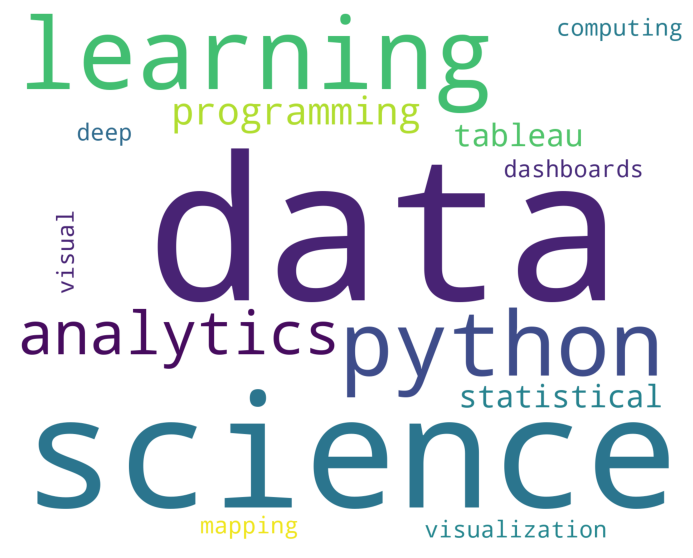

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=1000, margin=10, background_color='black',
scale=3, relative_scaling = 0.5, width=500, height=400,
random_state=1).generate(' '.join(skill_words))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
#wc.to_file("/wordcloud.png")